In [1]:
# Import libraries
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from matplotlib.pyplot import specgram
import pandas as pd
import glob
from sklearn.metrics import confusion_matrix
import IPython.display as ipd  # To play sound in the notebook
import os
import sys
import warnings
# ignore warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning)

2023-12-02 19:35:47.746061: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2023-12-02 19:35:47.773819: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-02 19:35:47.773843: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-02 19:35:47.774563: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-12-02 19:35:47.778766: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2023-12-02 19:35:47.779062: I tensorflow/core/platform/cpu_feature_guard.cc:1

In [2]:
!pip install resampy==0.2.2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 323.4/323.4 kB 1.5 MB/s eta 0:00:000:00:010:00:01:01
  Preparing metadata (setup.py) ... done
  Created wheel for resampy: filename=resampy-0.2.2-py3-none-any.whl size=320712 sha256=45fc73446c2d3fb810ff57047dddfbabfe42a2bc02a340adbd1c029fc8bf5adc
  Stored in directory: /home/student/.cache/pip/wheels/0f/df/63/a2209e98c9b8599049252b409794538bff2aa0d37b5e71fab6
Successfully built resampy


In [ ]:
pip install tqdm

In [2]:


TESS = "Datasets/TESS/tess toronto emotional speech set data/TESS Toronto emotional speech set data/"
RAV = "Datasets/RAVDESS/audio_speech_actors_01-24/"


In [3]:
import os
import pandas as pd

#RAV = 'your_directory_path_here'  # Replace with the actual path to your directory

dir_list = os.listdir(RAV)
dir_list.sort()

emotion = []
path = []

for i in dir_list:
    fname = os.listdir(os.path.join(RAV, i))
    for f in fname:
        part = f.split('.')[0].split('-')
        emotion.append(int(part[2]))
        path.append(os.path.join(RAV, i, f))

RAV_df = pd.DataFrame(emotion, columns=['emotion'])
RAV_df['emotion'] = RAV_df['emotion'].replace({
    1: 'neutral', 2: 'neutral', 3: 'happy', 4: 'sad', 5: 'angry', 6: 'fear', 7: 'disgust', 8: 'surprise'
})

RAV_df['labels'] = RAV_df['emotion']
RAV_df['source'] = 'RAVDESS'
RAV_df = pd.concat([RAV_df, pd.DataFrame(path, columns=['path'])], axis=1)
RAV_df = RAV_df.drop(['emotion'], axis=1)

print(RAV_df['labels'].value_counts())


labels
neutral     288
surprise    192
fear        192
sad         192
disgust     192
happy       192
angry       192
Name: count, dtype: int64


In [4]:
# Pick a fearful track
fname = RAV + 'Actor_14/03-01-06-02-02-02-14.wav'
data, sampling_rate = librosa.load(fname)
plt.figure(figsize=(15, 5))


# Lets play the audio
ipd.Audio(fname)

<Figure size 1500x500 with 0 Axes>

In [5]:
# Pick a happy track
fname = RAV + 'Actor_14/03-01-03-02-02-02-14.wav'
data, sampling_rate = librosa.load(fname)
plt.figure(figsize=(15, 5))
#librosa.display.waveplot(data, sr=sampling_rate)

# Lets play the audio
ipd.Audio(fname)

<Figure size 1500x500 with 0 Axes>

In [6]:
dir_list = os.listdir(TESS)
dir_list.sort()
dir_list

['OAF_Fear',
 'OAF_Pleasant_surprise',
 'OAF_Sad',
 'OAF_angry',
 'OAF_disgust',
 'OAF_happy',
 'OAF_neutral',
 'YAF_angry',
 'YAF_disgust',
 'YAF_fear',
 'YAF_happy',
 'YAF_neutral',
 'YAF_pleasant_surprised',
 'YAF_sad']

In [7]:
path = []
emotion = []

for i in dir_list:
    fname = os.listdir(TESS + i)
    for f in fname:
        if i == 'OAF_angry' or i == 'YAF_angry':
            emotion.append('angry')
        elif i == 'OAF_disgust' or i == 'YAF_disgust':
            emotion.append('disgust')
        elif i == 'OAF_Fear' or i == 'YAF_fear':
            emotion.append('fear')
        elif i == 'OAF_happy' or i == 'YAF_happy':
            emotion.append('happy')
        elif i == 'OAF_neutral' or i == 'YAF_neutral':
            emotion.append('neutral')
        elif i == 'OAF_Pleasant_surprise' or i == 'YAF_pleasant_surprised':
            emotion.append('surprise')
        elif i == 'OAF_Sad' or i == 'YAF_sad':
            emotion.append('sad')
        else:
            emotion.append('Unknown')
        path.append(TESS + i + "/" + f)

TESS_df = pd.DataFrame(emotion, columns = ['labels'])
TESS_df['source'] = 'TESS'
TESS_df = pd.concat([TESS_df,pd.DataFrame(path, columns = ['path'])],axis=1)
TESS_df.labels.value_counts()

labels
fear        400
surprise    400
sad         400
angry       400
disgust     400
happy       400
neutral     400
Name: count, dtype: int64

In [8]:
Crema_dir = "Datasets/CREMA_D/AudioWAV/"

emotion = []
path = []

for file in os.listdir(Crema_dir):
    audio_path = os.path.join(Crema_dir, file)
    id_arr = file.split('_')
    emo_id = id_arr[2]
    if emo_id == 'NEU':
        emotion.append('neutral')
    elif emo_id == 'HAP':
        emotion.append('happy')
    elif emo_id == 'SAD':
        emotion.append('sad')
    elif emo_id == 'ANG':
        emotion.append('angry')
    elif emo_id == 'FEA':
        emotion.append('fear')
    elif emo_id == 'DIS':
        emotion.append('disgust')
    else:
        emotion.append('unknown')
    path.append(audio_path)

Crema_df = pd.DataFrame(emotion, columns=['labels'])
Crema_df['source'] = 'CREMA'
Crema_df = pd.concat([Crema_df, pd.DataFrame(path, columns=['path'])], axis=1)
Crema_df.labels.value_counts()

labels
disgust    1271
happy      1271
fear       1271
sad        1271
angry      1271
neutral    1087
Name: count, dtype: int64

In [9]:
# lets play a fearful track
fname = TESS + 'YAF_fear/YAF_dog_fear.wav'

data, sampling_rate = librosa.load(fname)
plt.figure(figsize=(15, 5))

ipd.Audio(fname)

<Figure size 1500x500 with 0 Axes>

In [10]:
# lets play a happy track
fname =  TESS + 'YAF_happy/YAF_dog_happy.wav'

data, sampling_rate = librosa.load(fname)
plt.figure(figsize=(15, 5))

ipd.Audio(fname)

<Figure size 1500x500 with 0 Axes>

In [11]:
EmotionData = pd.concat([RAV_df, TESS_df, Crema_df], axis = 0)
print(EmotionData.labels.value_counts())
#EmotionData.head()
EmotionData.to_csv("Data_path.csv",index=False)

labels
fear        1863
sad         1863
disgust     1863
happy       1863
angry       1863
neutral     1775
surprise     592
Name: count, dtype: int64


In [12]:
EmotionData.tail()

,labels,source,path
7437,angry,CREMA,Datasets/CREMA_D/AudioWAV/1012_IEO_ANG_MD.wav
7438,sad,CREMA,Datasets/CREMA_D/AudioWAV/1062_ITS_SAD_XX.wav
7439,fear,CREMA,Datasets/CREMA_D/AudioWAV/1004_WSI_FEA_XX.wav
7440,sad,CREMA,Datasets/CREMA_D/AudioWAV/1003_TSI_SAD_XX.wav
7441,neutral,CREMA,Datasets/CREMA_D/AudioWAV/1070_TAI_NEU_XX.wav


In [13]:
# lets pick up the meta-data that we got from our first part of the Kernel
ref = pd.read_csv("Data_path.csv")
ref.head()

,labels,source,path
0,neutral,RAVDESS,Datasets/RAVDESS/audio_speech_actors_01-24/Act...
1,surprise,RAVDESS,Datasets/RAVDESS/audio_speech_actors_01-24/Act...
2,fear,RAVDESS,Datasets/RAVDESS/audio_speech_actors_01-24/Act...
3,sad,RAVDESS,Datasets/RAVDESS/audio_speech_actors_01-24/Act...
4,sad,RAVDESS,Datasets/RAVDESS/audio_speech_actors_01-24/Act...


In [14]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import IPython.display as ipd


Lets extract MFCC feature for one of the example voice

In [15]:
# # Source - RAVDESS; Gender - Male; Emotion - Happy
# path = "/content/drive/MyDrive/Colab Notebooks/RAVDESS/audio_speech_actors_01-24/Actor_11/03-01-02-01-01-01-11.wav"
# X, sample_rate = librosa.load(path, res_type='kaiser_fast',duration=2.5,sr=22050*2,offset=0.5)
# mfcc = librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13)

# # audio wave
# plt.figure(figsize=(20, 15))
# plt.subplot(3,1,1)
# #librosa.display.waveplot(X, sr=sample_rate)
# plt.title('Audio sampled at 44100 hrz')

# # MFCC
# plt.figure(figsize=(20, 15))
# plt.subplot(3,1,1)
# #Here we are displaying Spectrogram for the Happy voice and lets visualiza how its look like
# librosa.display.specshow(mfcc, x_axis='time')
# plt.ylabel('MFCC')
# plt.colorbar()

# ipd.Audio(path)

Now lets extract this feature for entire dataset and then concatinate this feature column into our dataframe

In [16]:
import resampy
import librosa
import pandas as pd
from tqdm import tqdm

df = pd.DataFrame(columns=['feature'])

# loop feature extraction over the entire dataset
counter = 0

# Use tqdm to display a progress bar
for index, path in tqdm(enumerate(ref.path), total=len(ref.path), desc="Processing Audio Files"):
    X, sample_rate = librosa.load(path,
                                  res_type='kaiser_fast',
                                  duration=2.5,
                                  sr=44100,
                                  offset=0.5)

    sample_rate = np.array(sample_rate)

    # mean as the feature. Could do min and max etc as well.
    mfccs = np.mean(librosa.feature.mfcc(y=X,
                                         sr=sample_rate,
                                         n_mfcc=13),
                    axis=0)
    df.loc[counter] = [mfccs]
    counter = counter + 1

# Check a few records to make sure it's processed successfully
print(len(df))
df.head()


Processing Audio Files: 100%|█████████████| 11682/11682 [05:32<00:00, 35.12it/s]

11682


,feature
0,"[-70.74651, -70.74651, -70.02528, -69.13127, -..."
1,"[-64.51157, -64.51157, -64.51157, -64.51157, -..."
2,"[-45.62977, -45.374794, -45.19532, -43.043472,..."
3,"[-70.22963, -70.22963, -70.22963, -70.22963, -..."
4,"[-68.04908, -68.04908, -68.04908, -68.04908, -..."


In [17]:
#concatinating the feature column into the complete dataframe
df = pd.concat([ref,pd.DataFrame(df['feature'].values.tolist())],axis=1)
df[:5]

,labels,source,path,0,1,2,3,4,5,6,...,206,207,208,209,210,211,212,213,214,215
0,neutral,RAVDESS,Datasets/RAVDESS/audio_speech_actors_01-24/Act...,-70.746513,-70.746513,-70.025284,-69.131271,-70.746513,-70.746513,-70.746513,...,-30.967125,-32.430031,-32.474728,-34.334450,-38.280952,-39.110352,-41.010277,-40.282722,-41.446358,-46.433792
1,surprise,RAVDESS,Datasets/RAVDESS/audio_speech_actors_01-24/Act...,-64.511574,-64.511574,-64.511574,-64.511574,-64.511574,-64.511574,-64.511574,...,-61.820129,-63.520226,-64.511574,-64.511574,-64.511574,-64.463341,-64.511574,-64.511574,-64.511574,-64.511574
2,fear,RAVDESS,Datasets/RAVDESS/audio_speech_actors_01-24/Act...,-45.629768,-45.374794,-45.195320,-43.043472,-43.082603,-44.332863,-44.626202,...,-26.977255,-29.308031,-26.958963,-26.997744,-27.167728,-26.274006,-26.835957,-26.284428,-16.259249,-9.221558
3,sad,RAVDESS,Datasets/RAVDESS/audio_speech_actors_01-24/Act...,-70.229630,-70.229630,-70.229630,-70.229630,-70.229630,-70.229630,-70.229630,...,-70.229630,-70.229630,-70.229630,-70.229630,-70.229630,-66.133575,-62.637356,-66.394379,-70.229630,-70.229630
4,sad,RAVDESS,Datasets/RAVDESS/audio_speech_actors_01-24/Act...,-68.049080,-68.049080,-68.049080,-68.049080,-68.049080,-68.049080,-68.049080,...,-68.049080,-68.049080,-68.049080,-68.049080,-68.049080,-68.049080,-68.049080,-68.049080,-68.049080,-68.049080


In [18]:
# replace NA with 0
df=df.fillna(0)
print(df.shape)
df[:5]

(11682, 219)


,labels,source,path,0,1,2,3,4,5,6,...,206,207,208,209,210,211,212,213,214,215
0,neutral,RAVDESS,Datasets/RAVDESS/audio_speech_actors_01-24/Act...,-70.746513,-70.746513,-70.025284,-69.131271,-70.746513,-70.746513,-70.746513,...,-30.967125,-32.430031,-32.474728,-34.334450,-38.280952,-39.110352,-41.010277,-40.282722,-41.446358,-46.433792
1,surprise,RAVDESS,Datasets/RAVDESS/audio_speech_actors_01-24/Act...,-64.511574,-64.511574,-64.511574,-64.511574,-64.511574,-64.511574,-64.511574,...,-61.820129,-63.520226,-64.511574,-64.511574,-64.511574,-64.463341,-64.511574,-64.511574,-64.511574,-64.511574
2,fear,RAVDESS,Datasets/RAVDESS/audio_speech_actors_01-24/Act...,-45.629768,-45.374794,-45.195320,-43.043472,-43.082603,-44.332863,-44.626202,...,-26.977255,-29.308031,-26.958963,-26.997744,-27.167728,-26.274006,-26.835957,-26.284428,-16.259249,-9.221558
3,sad,RAVDESS,Datasets/RAVDESS/audio_speech_actors_01-24/Act...,-70.229630,-70.229630,-70.229630,-70.229630,-70.229630,-70.229630,-70.229630,...,-70.229630,-70.229630,-70.229630,-70.229630,-70.229630,-66.133575,-62.637356,-66.394379,-70.229630,-70.229630
4,sad,RAVDESS,Datasets/RAVDESS/audio_speech_actors_01-24/Act...,-68.049080,-68.049080,-68.049080,-68.049080,-68.049080,-68.049080,-68.049080,...,-68.049080,-68.049080,-68.049080,-68.049080,-68.049080,-68.049080,-68.049080,-68.049080,-68.049080,-68.049080


In [19]:
from sklearn.model_selection import train_test_split

In [20]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(['path','labels','source'],axis=1)
                                                    , df.labels
                                                    , test_size=0.25
                                                    , shuffle=True
                                                    , random_state=42
                                                   )

# Lets see how the data present itself before normalisation
X_train[150:160]

,0,1,2,3,4,5,6,7,8,9,...,206,207,208,209,210,211,212,213,214,215
7965,-10.091297,-11.602675,-13.388033,-15.959890,-16.204908,-16.656113,-19.366051,-17.796608,-16.226122,-14.939763,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3649,-14.680985,-17.194355,-22.174683,-21.189484,-20.293251,-20.759792,-21.637520,-21.725859,-22.104153,-20.090359,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2286,-21.018913,-23.355232,-26.086290,-25.927580,-26.512386,-27.677610,-26.434568,-28.509735,-28.859915,-30.396709,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5882,-15.366588,-15.574951,-15.479643,-17.947594,-20.105844,-23.438427,-17.304104,-16.663506,-20.468517,-19.148859,...,-19.854115,-19.179846,-19.815128,-18.902399,-18.063910,-18.204071,-18.632729,-21.421764,-21.301188,-22.559589
4934,-18.413921,-19.016375,-20.666166,-18.470919,-18.979965,-19.036999,-19.484953,-20.021828,-19.181786,-18.781521,...,-18.772877,-19.121387,-18.399853,-17.515791,-18.635529,-21.183289,-20.746525,-20.687105,-18.450302,-20.000990
11577,-24.174849,-20.948866,-21.176662,-19.266228,-19.291361,-19.603569,-17.869045,-18.872204,-18.309690,-18.058146,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8273,-21.549608,-16.950478,-16.225157,-17.907158,-19.547588,-18.509031,-18.527813,-19.713118,-17.605076,-17.799271,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7599,-21.310719,-19.449181,-19.330626,-20.502075,-19.916399,-19.751383,-20.029812,-20.646248,-21.380760,-21.553982,...,-20.448978,-20.044603,-19.669905,-19.013754,-18.332590,-17.138849,-17.598406,-18.189251,-17.074200,-17.071436
8460,-13.427135,-12.891647,-14.939126,-13.489295,-12.074581,-12.179356,-13.196903,-11.607733,-11.864299,-11.488476,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3219,-21.063993,-23.508892,-29.936930,-29.917427,-32.217308,-35.351669,-34.660782,-34.163212,-35.808601,-33.574879,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [ ]:
# Lets do data normalization
#Here we are using z-score normalization technique
mean = np.mean(X_train, axis=0)
std = np.std(X_train, axis=0)

X_train = (X_train - mean)/std
X_test = (X_test - mean)/std

# Check the dataset now
X_train[150:160]

,0,1,2,3,4,5,6,7,8,9,...,206,207,208,209,210,211,212,213,214,215
3182,0.449388,0.431718,0.389022,0.662362,0.872763,0.709121,0.355988,0.183877,0.239956,0.111916,...,0.672050,0.672032,0.671763,0.671913,0.672175,0.672396,0.672414,0.673140,0.668275,0.660531
386,-1.436161,-1.295204,-1.145574,-1.387728,-1.519636,-1.374783,-1.427127,-1.352730,-1.286808,-1.293813,...,-1.518510,-1.618402,-1.627461,-1.567956,-1.516741,-1.515569,-1.453644,-1.430159,-1.368017,-1.212564
847,-1.565015,-1.388807,-1.349472,-1.106740,-1.046360,-1.241206,-1.323812,-1.168349,-1.092076,-1.191248,...,-1.742343,-1.740237,-1.692053,-1.623740,-1.497590,-1.508842,-1.489009,-1.499155,-1.624555,-1.657775
2836,0.613562,0.660254,0.516327,0.583396,0.648904,0.653726,0.617204,0.559178,0.578014,0.616958,...,0.672050,0.672032,0.671763,0.671913,0.672175,0.672396,0.672414,0.673140,0.668275,0.660531
1723,0.596852,0.569077,0.671056,0.575951,0.465964,0.285639,0.206304,0.077463,0.206222,0.199815,...,0.672050,0.672032,0.671763,0.671913,0.672175,0.672396,0.672414,0.673140,0.668275,0.660531
4226,0.826766,0.826267,0.594898,0.573336,0.622692,0.669408,0.678613,0.798168,0.794034,0.823069,...,0.672050,0.672032,0.671763,0.671913,0.672175,0.672396,0.672414,0.673140,0.668275,0.660531
1978,0.205249,0.200245,0.122300,0.041778,0.204080,0.175405,0.341977,0.346458,0.375490,0.352982,...,0.672050,0.672032,0.671763,0.671913,0.672175,0.672396,0.672414,0.673140,0.668275,0.660531
2425,0.465198,0.517926,0.616844,0.621555,0.649758,0.597596,0.537627,0.706919,0.788878,0.942109,...,0.672050,0.672032,0.671763,0.671913,0.672175,0.672396,0.672414,0.673140,0.668275,0.660531
1497,0.581866,0.478559,0.586107,0.423580,0.358297,0.408494,0.350795,0.313657,0.268189,0.185537,...,0.672050,0.672032,0.671763,0.671913,0.672175,0.672396,0.672414,0.673140,0.668275,0.660531
2583,0.508055,0.612159,1.127126,1.124632,1.053755,0.979812,0.922993,0.893006,0.939424,1.014635,...,0.672050,0.672032,0.671763,0.671913,0.672175,0.672396,0.672414,0.673140,0.668275,0.660531


In [25]:
print(X_train.shape)
X_test.shape

(8761, 216)


(2921, 216)

In [26]:
from keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
import pickle

X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)

# Label encode the target
lb = LabelEncoder()
y_train = to_categorical(lb.fit_transform(y_train))
y_test = to_categorical(lb.fit_transform(y_test))

print(X_train.shape)
print(lb.classes_)

# Pickle the lb object for future use
filename = 'labels'
with open(filename, 'wb') as outfile:
    pickle.dump(lb, outfile)


(8761, 216)
['angry' 'disgust' 'fear' 'happy' 'neutral' 'sad' 'surprise']


In [27]:
X_train = np.expand_dims(X_train, axis=2)
X_test = np.expand_dims(X_test, axis=2)
X_train.shape

(8761, 216, 1)

In [28]:
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Activation, BatchNormalization, Dropout
import keras
model = Sequential()
model.add(Conv1D(256, 8, padding='same',input_shape=(X_train.shape[1],1)))
# X_train.shape[1] = No. of Columns
model.add(Activation('relu'))
model.add(Conv1D(256, 8, padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))
model.add(MaxPooling1D(pool_size=(8)))
model.add(Conv1D(128, 8, padding='same'))
model.add(Activation('relu'))
model.add(Conv1D(128, 8, padding='same'))
model.add(Activation('relu'))
model.add(Conv1D(128, 8, padding='same'))
model.add(Activation('relu'))
model.add(Conv1D(128, 8, padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))
model.add(MaxPooling1D(pool_size=(8)))
model.add(Conv1D(64, 8, padding='same'))
model.add(Activation('relu'))
model.add(Conv1D(64, 8, padding='same'))
model.add(Activation('relu'))
model.add(Flatten())
model.add(Dense(7)) # Target class number
model.add(Activation('softmax'))
opt = keras.optimizers.Adam(lr=0.0001)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 216, 256)          2304      
                                                                 
 activation (Activation)     (None, 216, 256)          0         
                                                                 
 conv1d_1 (Conv1D)           (None, 216, 256)          524544    
                                                                 
 batch_normalization (Batch  (None, 216, 256)          1024      
 Normalization)                                                  
                                                                 
 activation_1 (Activation)   (None, 216, 256)          0         
                                                                 
 dropout (Dropout)           (None, 216, 256)          0         
                                                        

In [45]:
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Activation, BatchNormalization, Dropout
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from keras.utils import to_categorical

# Assuming X_train, y_train, X_test, y_test are your input features and labels

# One-hot encode the labels using LabelBinarizer
label_binarizer = LabelBinarizer()
y_train_one_hot = label_binarizer.fit_transform(y_train)
y_test_one_hot = label_binarizer.transform(y_test)

# Reshape input data (assuming X_train and X_test are 2D arrays)
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# Build the model
model = Sequential()
model.add(Conv1D(256, 8, padding='same', input_shape=(X_train.shape[1], 1)))
model.add(Activation('relu'))
model.add(Conv1D(256, 8, padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))
model.add(MaxPooling1D(pool_size=(8)))
model.add(Conv1D(128, 8, padding='same'))
model.add(Activation('relu'))
model.add(Conv1D(128, 8, padding='same'))
model.add(Activation('relu'))
model.add(Conv1D(128, 8, padding='same'))
model.add(Activation('relu'))
model.add(Conv1D(128, 8, padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))
model.add(MaxPooling1D(pool_size=(8)))
model.add(Conv1D(64, 8, padding='same'))
model.add(Activation('relu'))
model.add(Conv1D(64, 8, padding='same'))
model.add(Activation('relu'))
model.add(Flatten())
model.add(Dense(7, activation='softmax'))  # Target class number
opt = Adam(lr=0.0001)
model.summary()

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

# Early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model with early stopping
model_history = model.fit(X_train, y_train_one_hot, batch_size=10, epochs=50, 
                          validation_data=(X_test, y_test_one_hot), callbacks=[early_stopping])


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_16 (Conv1D)          (None, 216, 256)          2304      
                                                                 
 activation_17 (Activation)  (None, 216, 256)          0         
                                                                 
 conv1d_17 (Conv1D)          (None, 216, 256)          524544    
                                                                 
 batch_normalization_4 (Bat  (None, 216, 256)          1024      
 chNormalization)                                                
                                                                 
 activation_18 (Activation)  (None, 216, 256)          0         
                                                                 
 dropout_4 (Dropout)         (None, 216, 256)          0         
                                                      

Epoch 31/50
877/877 [==============================] - 56s 63ms/step - loss: 1.0288 - accuracy: 0.5846 - val_loss: 1.2985 - val_accuracy: 0.4735
Epoch 32/50
877/877 [==============================] - 55s 63ms/step - loss: 1.0182 - accuracy: 0.5908 - val_loss: 1.3700 - val_accuracy: 0.4653
Epoch 33/50
877/877 [==============================] - 56s 64ms/step - loss: 1.0086 - accuracy: 0.5916 - val_loss: 1.3539 - val_accuracy: 0.4611
Epoch 34/50
877/877 [==============================] - 56s 64ms/step - loss: 0.9852 - accuracy: 0.6031 - val_loss: 1.3444 - val_accuracy: 0.4998
Epoch 35/50
877/877 [==============================] - 56s 64ms/step - loss: 0.9643 - accuracy: 0.6061 - val_loss: 1.3334 - val_accuracy: 0.4625
Epoch 36/50
877/877 [==============================] - 57s 65ms/step - loss: 0.9732 - accuracy: 0.6087 - val_loss: 1.3356 - val_accuracy: 0.4813


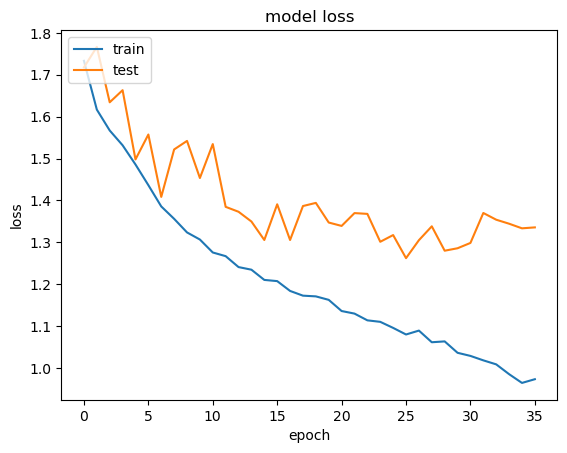

In [47]:
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [48]:
# Save model and weights
model_name = 'Emotion_Model.h5'
save_dir = os.path.join(os.getcwd(), 'saved_models')

if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model_path = os.path.join(save_dir, model_name)
model.save(model_path)
print('Save model and weights at %s ' % model_path)

# Save the model to disk
model_json = model.to_json()
with open("model_json.json", "w") as json_file:
    json_file.write(model_json)

Save model and weights at /home/student/SER/saved_models/Emotion_Model.h5 


In [49]:
from keras.models import model_from_json

# loading json and model architecture
json_file = open('model_json.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)

# load weights into new model
loaded_model.load_weights("saved_models/Emotion_Model.h5")
print("Loaded model from disk")

# Keras optimiser
opt = keras.optimizers.Adam(lr=0.0001)
loaded_model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
score = loaded_model.evaluate(X_test, y_test, verbose=0)
print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))

Loaded model from disk
accuracy: 49.33%


In [50]:
preds = loaded_model.predict(X_test,
                         batch_size=10,
                         verbose=1)

preds=preds.argmax(axis=1)
preds

293/293 [==============================] - 4s 14ms/step


array([0, 3, 1, ..., 1, 3, 0])

In [51]:
# predictions
preds = preds.astype(int).flatten()
preds = (lb.inverse_transform((preds)))
preds = pd.DataFrame({'predictedvalues': preds})

# Actual labels
actual=y_test.argmax(axis=1)
actual = actual.astype(int).flatten()
actual = (lb.inverse_transform((actual)))
actual = pd.DataFrame({'actualvalues': actual})

# Lets combined both of them into a single dataframe
finaldf = actual.join(preds)
finaldf.head()

,actualvalues,predictedvalues
0,angry,angry
1,neutral,happy
2,sad,disgust
3,sad,disgust
4,angry,happy


In [52]:
finaldf.to_csv('Predictions.csv', index=False)
finaldf.groupby('predictedvalues').count()

,actualvalues
predictedvalues,
angry,446
disgust,441
fear,291
happy,671
neutral,266
sad,696
surprise,110


In [53]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [54]:
classes = finaldf.actualvalues.unique()
classes.sort()
print(classification_report(finaldf.actualvalues, finaldf.predictedvalues, target_names=classes))

              precision    recall  f1-score   support

       angry       0.64      0.60      0.62       478
     disgust       0.46      0.45      0.45       458
        fear       0.46      0.29      0.36       458
       happy       0.38      0.54      0.44       465
     neutral       0.52      0.32      0.40       436
         sad       0.47      0.69      0.56       474
    surprise       0.92      0.66      0.77       152

    accuracy                           0.49      2921
   macro avg       0.55      0.51      0.51      2921
weighted avg       0.51      0.49      0.49      2921



In [55]:
import seaborn as sns

In [59]:
def print_confusion_matrix(confusion_matrix, class_names, figsize = (10,7), fontsize=14):
    df_cm = pd.DataFrame(
        confusion_matrix, index=class_names, columns=class_names,
    )
    fig = plt.figure(figsize=figsize)
    try:
        heatmap = sns.heatmap(df_cm, annot=True, fmt="d")
    except ValueError:
        raise ValueError("Confusion matrix values must be integers.")

    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Gender recode function
# def gender(row):
#     if row == 'female_disgust' or 'female_fear' or 'female_happy' or 'female_sad' or 'female_surprise' or 'female_neutral':
#         return 'female'
#     elif row == 'male_angry' or 'male_fear' or 'male_happy' or 'male_sad' or 'male_surprise' or 'male_neutral' or 'male_disgust':
#         return 'male'

0.49332420403971244


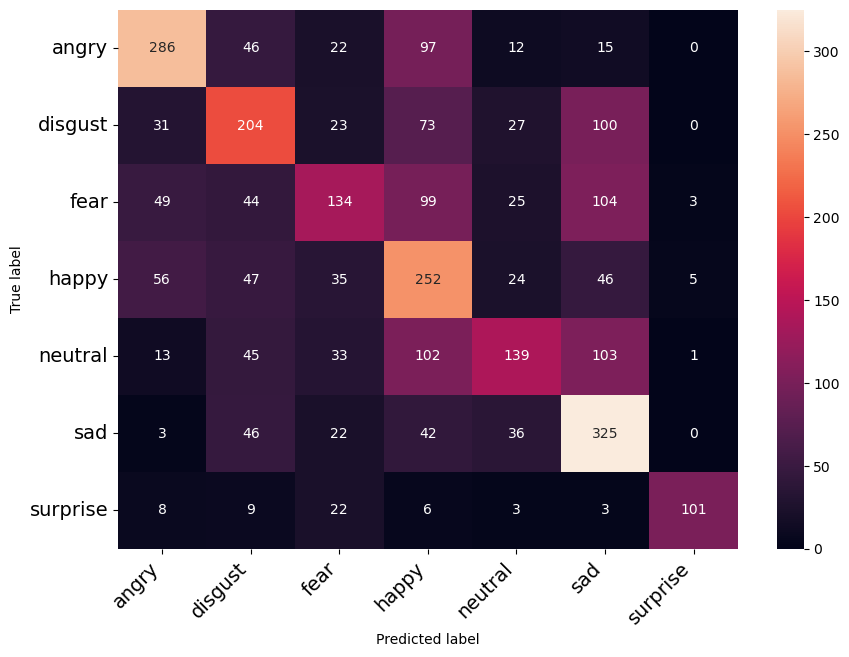

In [60]:
# Get the predictions file
finaldf = pd.read_csv("Predictions.csv")
classes = finaldf.actualvalues.unique()
classes.sort()

# Confusion matrix
c = confusion_matrix(finaldf.actualvalues, finaldf.predictedvalues)
print(accuracy_score(finaldf.actualvalues, finaldf.predictedvalues))
print_confusion_matrix(c, class_names = classes)

In [61]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Activation, BatchNormalization, Dropout
from keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from keras.callbacks import EarlyStopping

# Assuming X_train, y_train, X_test, y_test are your input features and labels

# One-hot encode the labels using LabelBinarizer
label_binarizer = LabelBinarizer()
y_train_one_hot = label_binarizer.fit_transform(y_train)
y_test_one_hot = label_binarizer.transform(y_test)

# Reshape input data (assuming X_train and X_test are 2D arrays)
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# Build the LSTM model
model = Sequential()
model.add(LSTM(256, input_shape=(X_train.shape[1], 1), return_sequences=True))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))
model.add(LSTM(128, return_sequences=True))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))
model.add(LSTM(64))
model.add(Activation('relu'))
model.add(Dense(7, activation='softmax'))  # Target class number
opt = Adam(lr=0.0001)
model.summary()

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

# Early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model with early stopping
model_history = model.fit(X_train, y_train_one_hot, batch_size=10, epochs=50, 
                          validation_data=(X_test, y_test_one_hot), callbacks=[early_stopping])


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 216, 256)          264192    
                                                                 
 activation_25 (Activation)  (None, 216, 256)          0         
                                                                 
 batch_normalization_6 (Bat  (None, 216, 256)          1024      
 chNormalization)                                                
                                                                 
 dropout_6 (Dropout)         (None, 216, 256)          0         
                                                                 
 lstm_1 (LSTM)               (None, 216, 128)          197120    
                                                                 
 activation_26 (Activation)  (None, 216, 128)          0         
                                                      

Epoch 43/50
877/877 [==============================] - 158s 180ms/step - loss: 1.4335 - accuracy: 0.4102 - val_loss: 1.4537 - val_accuracy: 0.4050
Epoch 44/50
877/877 [==============================] - 252s 287ms/step - loss: 1.4216 - accuracy: 0.4172 - val_loss: 1.4997 - val_accuracy: 0.3704
Epoch 45/50
877/877 [==============================] - 257s 293ms/step - loss: 1.4254 - accuracy: 0.4179 - val_loss: 1.4681 - val_accuracy: 0.3978
Epoch 46/50
877/877 [==============================] - 259s 295ms/step - loss: 1.4067 - accuracy: 0.4328 - val_loss: 1.4954 - val_accuracy: 0.3841
Epoch 47/50
877/877 [==============================] - 261s 297ms/step - loss: 1.4193 - accuracy: 0.4221 - val_loss: 1.4805 - val_accuracy: 0.3988
Epoch 48/50
877/877 [==============================] - 260s 296ms/step - loss: 1.3961 - accuracy: 0.4288 - val_loss: 1.4615 - val_accuracy: 0.4077
Epoch 49/50
877/877 [==============================] - 208s 238ms/step - loss: 1.4012 - accuracy: 0.4248 - val_loss: 1

In [62]:
accuracy = model_history.history['accuracy']  # Training accuracy
val_accuracy = model_history.history['val_accuracy']  # Validation accuracy

print(f'Training Accuracy: {accuracy[-1]:.4f}')
print(f'Validation Accuracy: {val_accuracy[-1]:.4f}')

Training Accuracy: 0.4365
Validation Accuracy: 0.4163
